Before I move on I want to look at my stats since I started Uni i October 2022.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend import preprocessing

In [55]:
df = pd.read_csv('AppleMusicCSV.csv', sep=';')
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Minutes'] = df['Seconds']/60
df['Hours'] = df['Minutes']/60
df.drop(columns='Seconds', inplace=True)
df.loc[df['Artist'].str.contains('LinManuel'), 'Artist'] = "Hamilton"
df.loc[df['Artist'].str.contains('Hamilton'), 'Artist'] = "Hamilton"
df.loc[df['Artist'].str.contains('Hilary Hahn'), 'Artist'] = "Classical"
df.loc[df['Artist'].str.contains('Berliner'), 'Artist'] = "Classical"
df

,Year,Month,Day,Artist,Song,Date,Minutes,Hours
0,2019,8,18,Marina and The Diamonds,Hollywood,2019-08-18,7.677267,0.127954
1,2019,8,18,Marina and The Diamonds,Hermit the Frog,2019-08-18,7.198167,0.119969
2,2019,8,18,Marina and The Diamonds,Girls,2019-08-18,6.959767,0.115996
3,2019,8,18,Marina and The Diamonds,Obsessions,2019-08-18,6.939667,0.115661
4,2019,8,18,Marina and The Diamonds,I Am Not a Robot,2019-08-18,6.781600,0.113027
...,...,...,...,...,...,...,...,...
44017,2023,11,28,Taylor Swift,Lover,2023-11-28,3.688333,0.061472
44018,2023,11,28,Ralph Kaminski,Duchy,2023-11-28,3.615083,0.060251
44019,2023,11,28,Alexandra Savior,Mirage,2023-11-28,3.430883,0.057181
44020,2023,11,28,Billie Eilish,Male Fantasy,2023-11-28,3.248117,0.054135


In [56]:
df = df.drop(df[df['Date'] < '2022-10-01'].index)
df

,Year,Month,Day,Artist,Song,Date,Minutes,Hours
32275,2022,10,2,Arctic Monkeys,Body Paint,2022-10-02,11.237383,0.187290
32276,2022,10,3,Taylor Swift,All Too Well (Taylor's Version),2022-10-03,5.486000,0.091433
32277,2022,10,3,Arctic Monkeys,There’d Better Be A Mirrorball,2022-10-03,4.429967,0.073833
32278,2022,10,3,David Bowie,Starman (2012 Remaster),2022-10-03,4.238217,0.070637
32279,2022,10,3,Arctic Monkeys,Body Paint,2022-10-03,3.292667,0.054878
...,...,...,...,...,...,...,...,...
44017,2023,11,28,Taylor Swift,Lover,2023-11-28,3.688333,0.061472
44018,2023,11,28,Ralph Kaminski,Duchy,2023-11-28,3.615083,0.060251
44019,2023,11,28,Alexandra Savior,Mirage,2023-11-28,3.430883,0.057181
44020,2023,11,28,Billie Eilish,Male Fantasy,2023-11-28,3.248117,0.054135


I think my favorite artists might be different but Lana Del Rey should still be the first one.

In [57]:
top_artists = df.groupby(['Artist'])[['Hours']].sum().sort_values(by='Hours', ascending=False)
top_artists.head(10)

,Hours
Artist,
Taylor Swift,188.506690
Lana Del Rey,172.935303
KARAŚ/ROGUCKI,154.104911
Ralph Kaminski,97.064420
The Dumplings,59.158926
Arctic Monkeys,54.488186
Myslovitz,51.295521
David Bowie,22.261982
Bronski Beat,21.605081


I should've expected it. Let's see the next 10.

In [58]:
top_artists.head(20).tail(10)

,Hours
Artist,
Billie Eilish,13.520697
Brodka,13.423285
Frank Ocean,11.368831
Radiohead,10.003684
Beyoncé,9.881898
Dire Straits,9.877478
Maanam,9.612559
TV Girl,8.536852
Beach House,8.241080


To show the proportions better:

In [59]:
import matplotx as matplotx
import matplotlib.axes
import matplotlib.artist

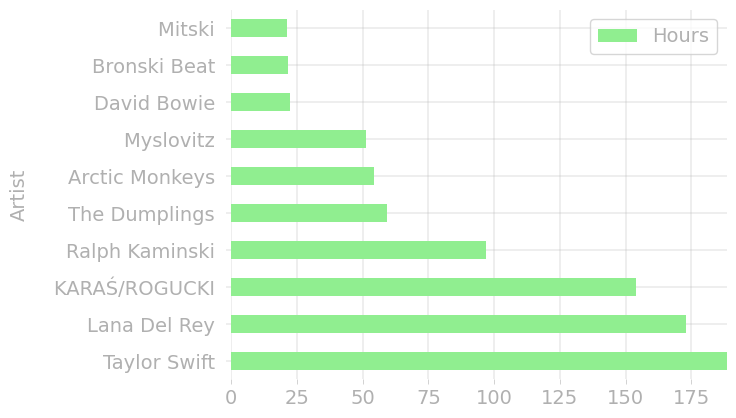

In [60]:
top_artists.iloc[:10].plot(kind='barh', color='Lightgreen')
plt.style.use(matplotx.styles.dufte)

<Axes: ylabel='Song'>

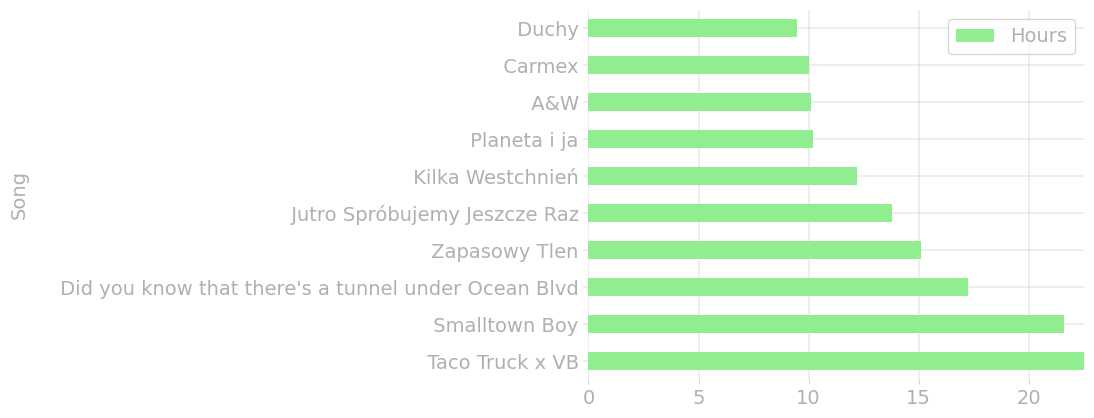

In [61]:
top_songs = df.groupby(['Song'])[['Hours']].sum().sort_values(by='Hours', ascending=False)
top_songs.iloc[:10].plot(kind='barh', color='Lightgreen')

I'll just copy code from the first notebook. Tbf everything here is just for me.

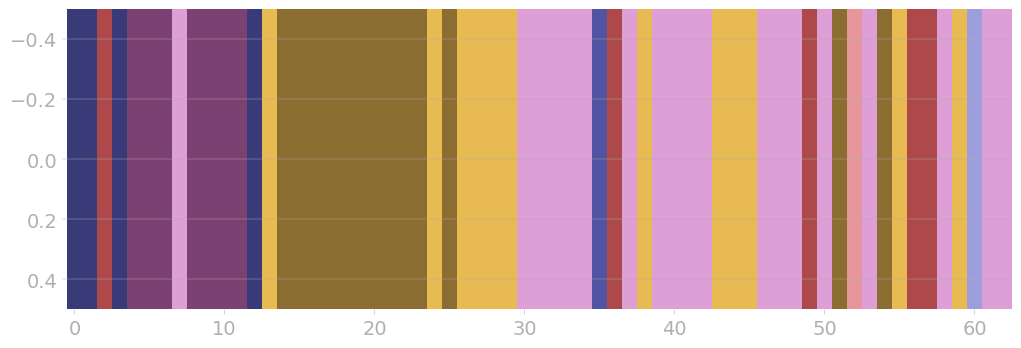

In [62]:
df['Week Number'] = df['Date'].dt.isocalendar().week
df.loc[df['Year'] == 2022, 'Week Number'] += 156
df.loc[df['Year'] == 2023, 'Week Number'] += 208

df['Minutes per Week'] = df.groupby(['Artist', 'Year', 'Week Number'])[['Minutes']].transform('sum')
df['Max minutes'] = df.groupby(['Week Number'])[['Minutes per Week']].transform('max')
fav_artist_in_week = df.loc[df['Minutes per Week'] == df['Max minutes']][['Week Number', 'Artist', 'Minutes per Week']].drop_duplicates()

fav_artist_in_week["Artist ID"] = df.groupby('Artist').ngroup()

pixel_per_bar = 15
dpi = 100

fig = plt.figure(figsize = (pixel_per_bar*fav_artist_in_week['Week Number'].count() / dpi, 3), dpi = dpi)

ax = fig.add_axes([0, 0, 1, 1])

ax.imshow(X = fav_artist_in_week[['Artist ID']].to_numpy().astype('float').T, cmap='tab20b', 
            aspect='auto', interpolation='nearest')

It turnes out I listen to around 10 artists this year over and over again.

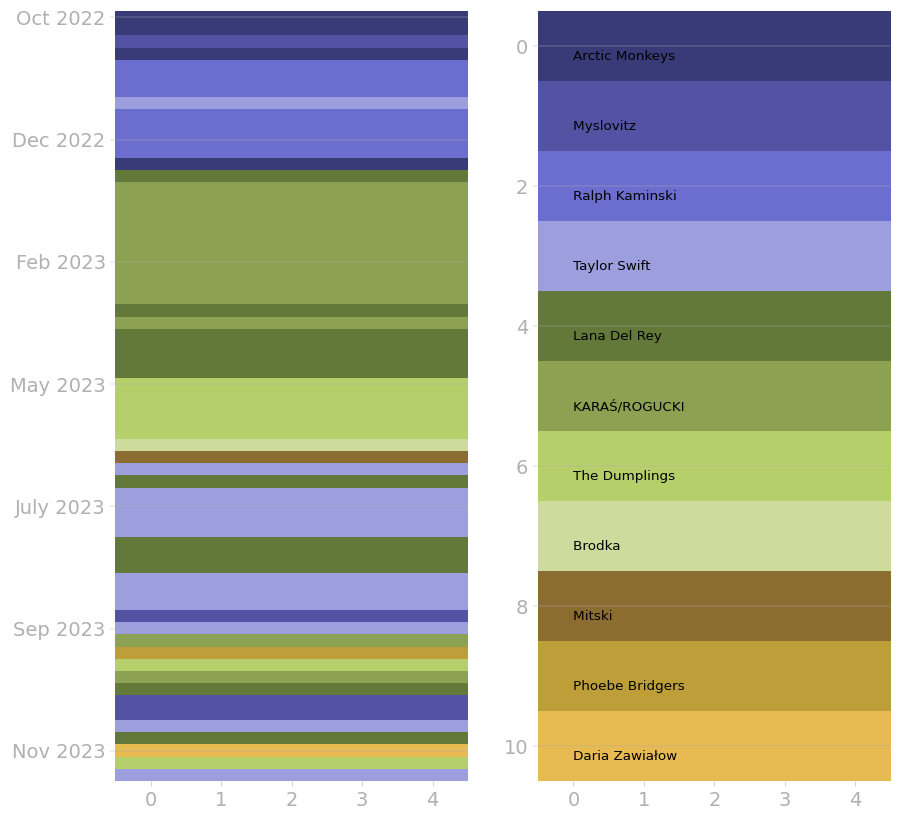

In [63]:
colors = pd.DataFrame(sns.color_palette('tab20b', fav_artist_in_week["Artist ID"].nunique()), fav_artist_in_week["Artist ID"].drop_duplicates())
colors['Color list'] = colors.values.tolist()
colors_list = colors['Color list']
colors_dict = colors_list.to_dict()

artist_np = np.ndarray(shape=(fav_artist_in_week['Week Number'].count(), 5, 3), dtype=float)

for i, week in enumerate(fav_artist_in_week.to_numpy()):
    for j in range(5):
        artist_np[i][j] = colors_dict.get(week[3])

artist_ID = fav_artist_in_week[['Artist ID', 'Artist']].drop_duplicates()
artist_ID.set_index('Artist ID')

artist_legend = np.ndarray(shape=(colors_list.count(), 5, 3), dtype=float)

for i, artist in enumerate(artist_ID.to_numpy()):
    for j in range(5):
        artist_legend[i][j] = colors_dict.get(artist[0])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10), sharex=True)

ax1.imshow(artist_np, aspect='auto')

ax2.imshow(artist_legend, aspect='auto')

ax1.set_yticks([0, 10, 20, 30, 40, 50, 60], ['Oct 2022', 'Dec 2022', 'Feb 2023', 'May 2023', 'July 2023', 'Sep 2023', 'Nov 2023'])

for i, artist in enumerate(artist_ID.to_numpy()):
    ax2.text(0, i+0.2, str(artist[1]), fontsize='x-small', color='black')

This code is terrible but I don't feel like fixing it

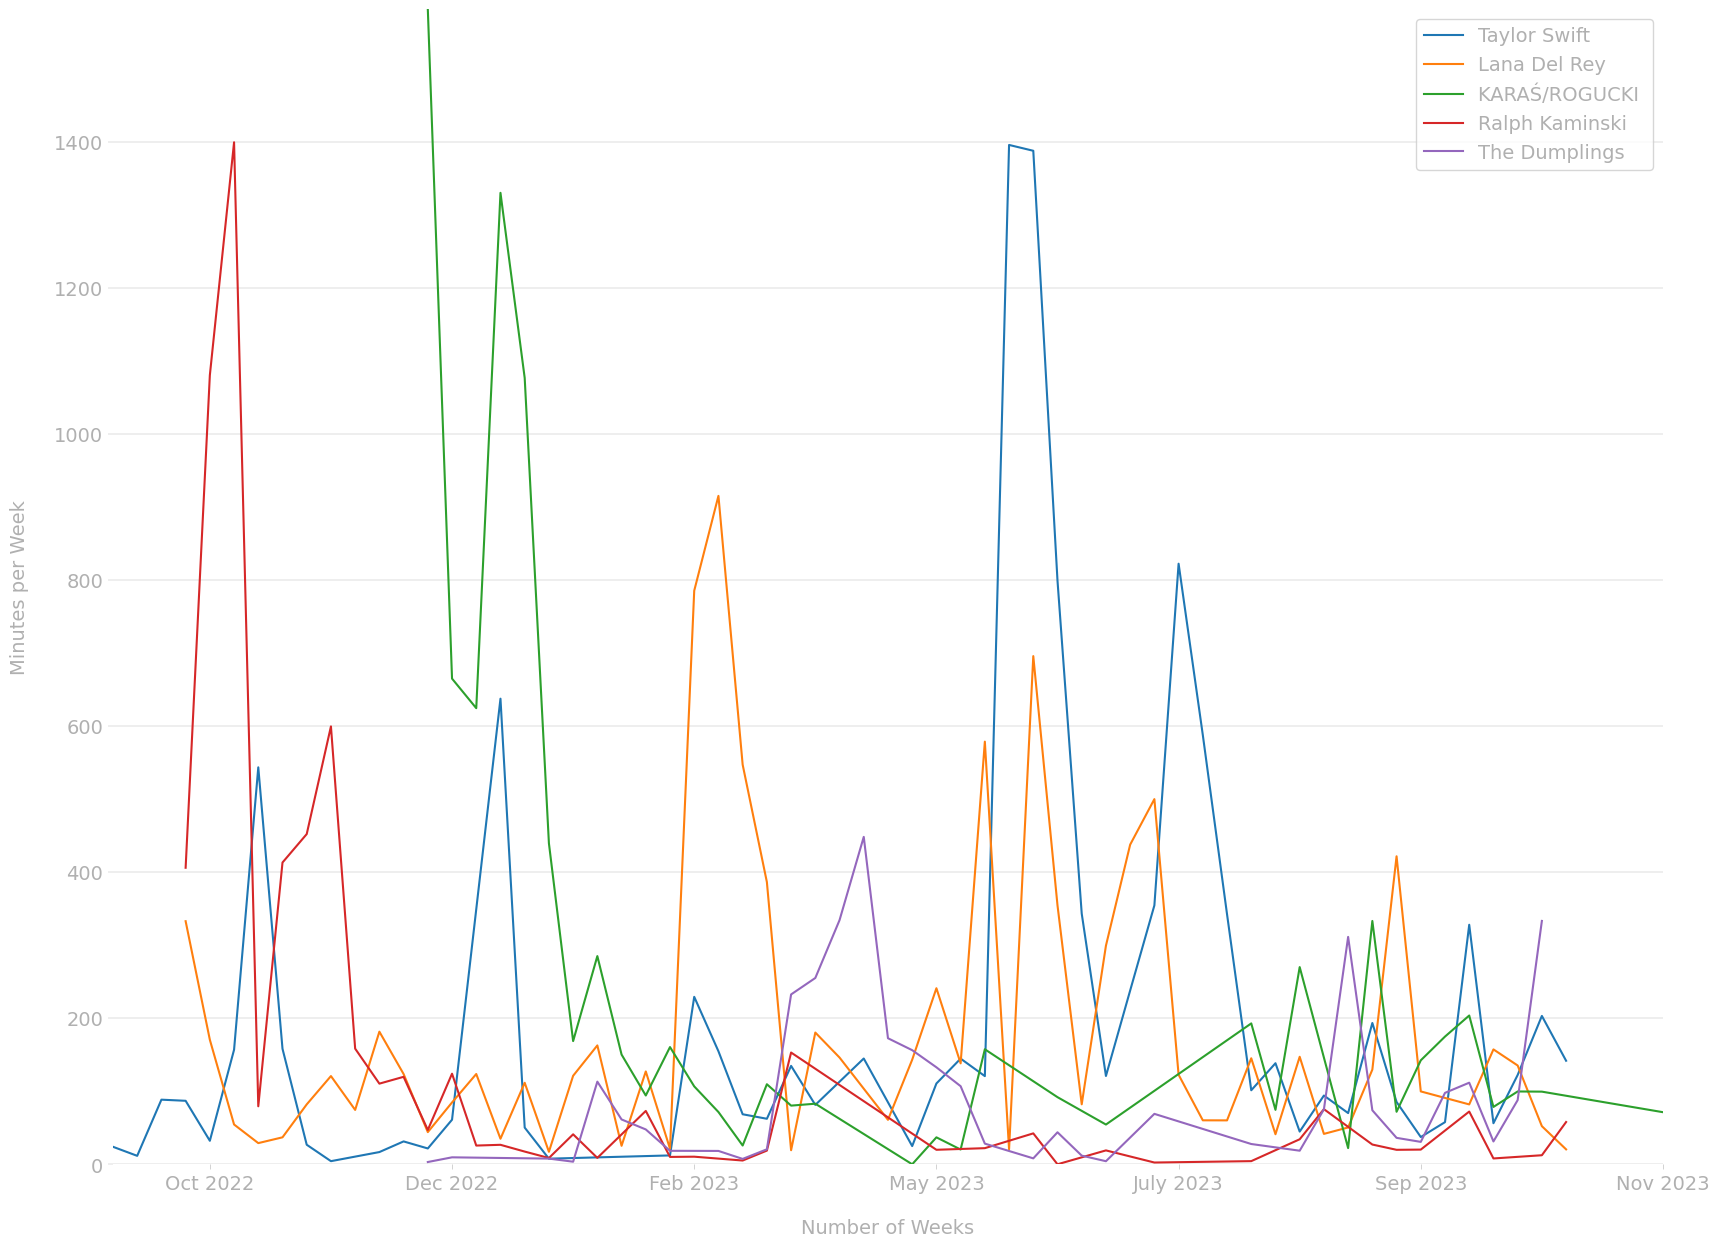

In [64]:
df['Cumsum of Minutes'] = df.groupby(['Artist'])[['Minutes']].cumsum()
df['Minutes per Week'] = df.groupby(['Artist', 'Year', 'Week Number'])[['Minutes']].transform('sum')

top_artists = df.groupby(['Artist'])[['Minutes', 'Hours']].sum().sort_values(by='Minutes', ascending=False)

dates_with_fav_artists = df.loc[df['Artist'].isin(top_artists.iloc[:5].index)][['Artist', 'Year', 'Week Number',
                                                                                'Minutes per Week']]


dates_with_fav_artists = dates_with_fav_artists.drop_duplicates().sort_values(by=['Artist', 'Year', 'Week Number'])

artist_x = {}
artist_y = {}

for artist in top_artists.iloc[:5].index:
    week = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Week Number'].to_numpy()
    year = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Year'].to_numpy()
    minutes = dates_with_fav_artists[dates_with_fav_artists['Artist'] == artist]['Minutes per Week'].to_numpy()

    artist_x.update({artist: week})
    artist_y.update({artist: minutes})

plt.figure(figsize=(20, 15))

plt.style.use(matplotx.styles.dufte)

for artist in top_artists.iloc[:5].index:
    x = artist_x.get(artist)
    y = artist_y.get(artist)

    plt.plot(x, y, label=artist)

plt.xticks([200, 210, 220, 230, 240, 250, 260], ['Oct 2022', 'Dec 2022', 'Feb 2023', 'May 2023', 'July 2023', 'Sep 2023', 'Nov 2023'])
plt.xlabel("Number of Weeks")
plt.ylabel("Minutes per Week")
plt.legend()

In [67]:
df = df[['Date', 'Artist']]
df = df.drop_duplicates()

df_list = df.groupby('Date')['Artist'].apply(list)
df_np = df_list.to_numpy()

encode_ = preprocessing.TransactionEncoder()
encode_arr = encode_.fit_transform(df_np)

encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)

frequent_itemsets = apriori(encode_df, min_support=0.09, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending = False)
frequent_itemsets

,support,itemsets
19,0.570312,(Lana Del Rey )
32,0.502604,(Taylor Swift )
2,0.335938,(Arctic Monkeys )
115,0.312500,"(Taylor Swift , Lana Del Rey )"
6,0.302083,(Bronski Beat )
...,...,...
153,0.091146,"(Jorja Smith , Lana Del Rey , Bronski Beat )"
156,0.091146,"(KARAŚ/ROGUCKI , SZA , Bronski Beat )"
26,0.091146,(Radiohead )
172,0.091146,"(The Weeknd , BØRNS & Lana Del Rey , Lana Del ..."


In [69]:
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.8,support_only=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bronski Beat ),(Lana Del Rey ),0.302083,0.570312,0.252604,0.836207,1.466226,0.080322,2.623355,0.455609
1,"(Arctic Monkeys , Ralph Kaminski )",(Lana Del Rey ),0.192708,0.570312,0.164062,0.851351,1.492780,0.054159,2.890625,0.408909
2,(Billie Eilish ),(Lana Del Rey ),0.195312,0.570312,0.161458,0.826667,1.449498,0.050069,2.478966,0.385374
3,"(Taylor Swift , Bronski Beat )",(Lana Del Rey ),0.166667,0.570312,0.145833,0.875000,1.534247,0.050781,3.437500,0.417857
4,(The Weeknd ),(Lana Del Rey ),0.164062,0.570312,0.143229,0.873016,1.530768,0.049662,3.383789,0.414783
...,...,...,...,...,...,...,...,...,...,...
176,"(The Weeknd , BØRNS & Lana Del Rey )",(Lana Del Rey ),0.109375,0.570312,0.091146,0.833333,1.461187,0.028768,2.578125,0.354386
177,"(BØRNS & Lana Del Rey , Lana Del Rey )",(The Weeknd ),0.101562,0.164062,0.091146,0.897436,5.470085,0.074483,8.150391,0.909565
178,"(Labrinth , Lana Del Rey )",(Bronski Beat ),0.098958,0.302083,0.091146,0.921053,3.049002,0.061252,8.840278,0.745830
179,"(Labrinth , Bronski Beat )",(Lana Del Rey ),0.091146,0.570312,0.091146,1.000000,1.753425,0.039164,inf,0.472779


I love everything about it. **181** rows with the confidence over 0.8. 100% confidence that after Labrinth and Bronski Beat I'll play Lana Del Rey. We've finally got some sets bigger that one. It's all so cool.